In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:,[3,4]].values

In [15]:
# Using the Elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

In [17]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

e:\Users\venky\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


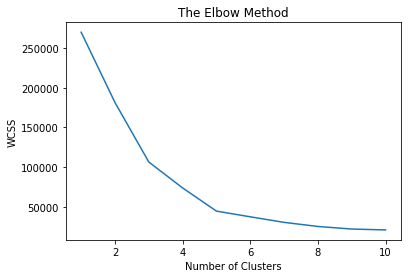

In [18]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# Fitting K - Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

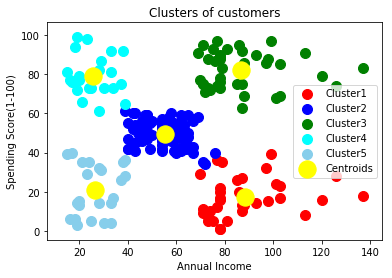

In [23]:
# visualize the cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s=100, c='red', label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s=100, c='blue', label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s=100, c='green', label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1], s=100, c='cyan', label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1], s=100, c='skyblue', label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()